In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
print("Imports done successfully")

Imports done successfully


In [4]:
# Check and change the current working directory to the project directory
print("Current working directory:", os.getcwd())
# Set the correct project directory
project_dir = r'C:\Users\DISHA\OneDrive\Desktop\FaceEmotionDetection' # Change this to your actual project directory
os.chdir(project_dir)
print("Changed working directory to:", os.getcwd())
# Set directories for training and testing data
train_dir = 'archive/Train'
test_dir = 'archive/Test'
# Define image size and batch size
img_size = 48
batch_size = 64
print("Directories and parameters")

Current working directory: C:\Users\DISHA\OneDrive\Desktop\FaceEmotionDetection
Changed working directory to: C:\Users\DISHA\OneDrive\Desktop\FaceEmotionDetection
Directories and parameters


In [5]:
# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest'
)
# Normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)
print("ImageDataGenerators created")

ImageDataGenerators created


In [6]:
# Load training data
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_size, img_size),
color_mode='grayscale',
batch_size=batch_size,
class_mode='categorical',
shuffle=True
)
# Load testing data
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(img_size, img_size),
color_mode='grayscale',

batch_size=batch_size,
class_mode='categorical',
shuffle=False
)
print("Data generators created")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Data generators created


In [7]:
# Build the model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(7, activation='softmax')
])
print("Model built successfully")

Model built successfully


C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
metrics=['accuracy'])
print("Model compiled successfully")



Model compiled successfully


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

print("Model trained successfully")

Epoch 1/50


C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.2409 - loss: 1.8225 - val_accuracy: 0.3192 - val_loss: 1.6807
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.2344 - loss: 1.8255 - val_accuracy: 0.7000 - val_loss: 1.2426
Epoch 3/50


C:\Users\DISHA\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 356s 786ms/step - accuracy: 0.3072 - loss: 1.7164 - val_accuracy: 0.4043 - val_loss: 1.5369
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.4531 - loss: 1.5343 - val_accuracy: 0.9000 - val_loss: 0.7351
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 144s 318ms/step - accuracy: 0.3661 - loss: 1.6105 - val_accuracy: 0.4615 - val_loss: 1.4345
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.4219 - loss: 1.5844 - val_accuracy: 0.7000 - val_loss: 1.0482
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 144s 320ms/step - accuracy: 0.4163 - loss: 1.5127 - val_accuracy: 0.4844 - val_loss: 1.3384
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.3906 - loss: 1.4977 - val_accuracy: 0.9000 - val_loss: 0.5064
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 140s 310ms/step - accuracy: 0.4385 - loss: 1.4524 - val_accuracy: 0.5130 - val_loss: 1.2879
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - accuracy: 0.5000 - loss: 1.4460 - va

Validation loss: 1.081113338470459, Validation accuracy: 0.585121214389801


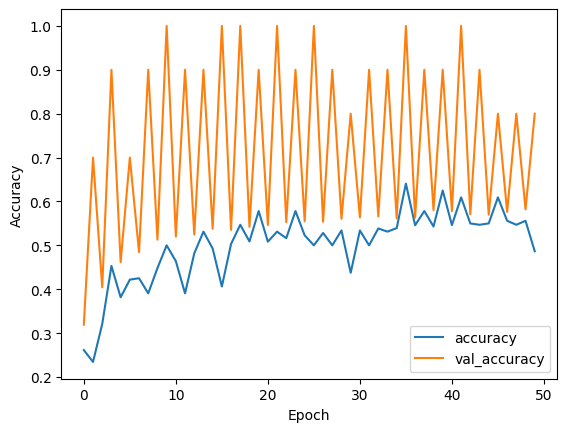

In [10]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(test_generator, verbose=0)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Save the model
model.save('FaceEmotionDetection.h5')
print("Model saved successfully")

Model saved successfully


In [13]:
# Function to predict emotion from an image
def predict_emotion(image):
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    predictions = model.predict(image)
    return np.argmax(predictions)
print("Prediction function defined")

Prediction function defined


In [16]:
from tensorflow.keras.models import load_model
# Load the previously saved model
model = load_model('EmotionDetectionModel.h5')

In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Ensure that the video capture is opened successfully
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

# Load the pre-trained model
model = load_model('EmotionDetectionModel.h5')

# Load the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame")
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(48, 48))
    
    for (x, y, w, h) in faces:
        # Extract the region of interest (the face)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float32') / 255.0
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.expand_dims(roi_gray, axis=-1)
        
        # Make a prediction on the face
        prediction = model.predict(roi_gray)
        max_index = np.argmax(prediction[0])
        predicted_emotion = emotion_labels[max_index]
        
        # Draw a rectangle around the face and label the emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
    # Display the resulting frame
    cv2.imshow('Facial Emotion Recognition', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

Error: Failed to capture frame
